In [1]:
from benchmark import *
%matplotlib inline
mcss = '../../../mcss_sizes.pkl'

In [2]:
def get_data(helpers):
    data = pd.concat(load(version, helpers, mcss) for version in ['stats21'])
    data = add_correct(data, thresh = 2.0)
    data = data[(data.index.get_level_values('protein') != 'A2AR')]
    data = data[data.mcss < 0.5]
    data = data[data.best_correct]
    return data

def results(data, helpers, alpha, method, features, ligs, aggregate):
    ligand = data.xs((helpers, method, ligs, features, alpha),
                      level=('helpers', 'mode', 'n_ligs', 'features', 'alpha')).filter(regex='rmsd|correct')
    target = ligand.groupby(level=list(range(len(ligand.index.levels)-1))).mean().dropna()
    print(ligand.shape[0])
    if aggregate == 'target':
        family = target.groupby(level=list(range(len(target.index.levels)-1))).mean()
    elif aggregate == 'ligand':
        family = ligand.groupby(level=list(range(len(ligand.index.levels)-2))).mean()
    perf = drug_average(family)
    return perf['glide_correct'][0], perf['combind_correct'][0]

In [3]:
def sweep_helpers(helpers, aggregate, save=None):
    ligs = [1, 3, 5, 10, 15, 20]
    data = get_data(helpers)
    combind, glide = [], []
    for lig in ligs:
        g, c = results(data, helpers, 1.0, 'standard', 'mcss_contact_hbond_sb', lig, aggregate)
        combind += [c]
        glide += [g]

    plt.plot(ligs, combind, color='green')
    plt.plot(ligs, glide, color='m')
    plt.xticks(ligs)
    plt.ylim(0.5, 0.7)
    if save:
        plt.savefig('../../../illustrator/benchmark/img/sweep-ligands-{}.pdf'.format(save))
    plt.show()
    
def sweep_features(helpers, aggregate, save=None):
    features = ['mcss_contact_hbond_sb',
                'contact_hbond_sb', 'mcss_hbond_sb', 'mcss_contact_sb', 'mcss_contact_hbond', 'mcss',]
    data = get_data(helpers)
    combind, glide = [], []
    for feature in features:
        g, c = results(data, helpers, 1.0, 'standard', feature, 20, aggregate)
        combind += [c]
        glide += [g]

    plt.bar(range(len(combind)+1), glide[:1]+combind, color=['m', 'green'] + ['lightgreen']*(len(features)-1))
    plt.xticks(range(len(features)+1), ['physics_only']+ features, rotation='vertical')
    plt.ylim(0.5, 0.7)
    if save:
        plt.savefig('../../../illustrator/benchmark/img/sweep-features-{}.pdf'.format(save))
    plt.show()

284
284
284
284
284
284


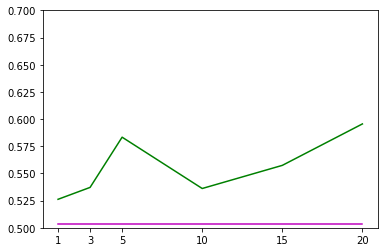

In [4]:
sweep_helpers('best_mcss', 'target', save='target_best_mcss')

284
284
284
284
284
284


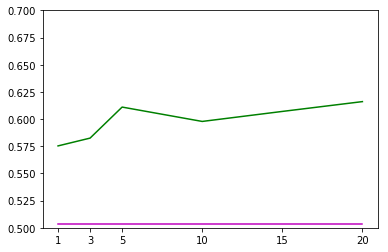

In [5]:
sweep_helpers('best_affinity_diverse', 'target', save='target_best_affinity_diverse')

280
280
280
280
280
284


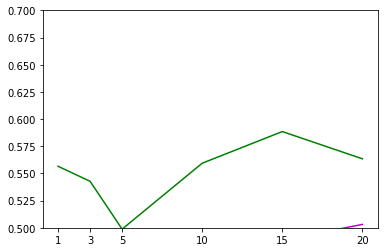

In [6]:
sweep_helpers('best_affinity', 'target', save='target_best_affinity')

284
284
284
284
284
284


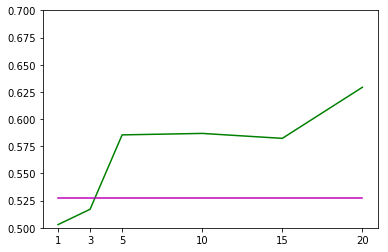

In [7]:
sweep_helpers('best_mcss', 'ligand', save='ligand_best_mcss')

284
284
284
284
284
284


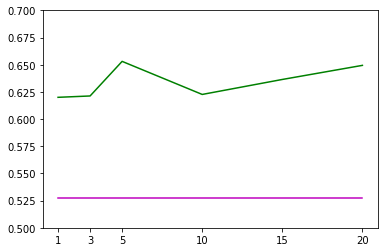

In [8]:
sweep_helpers('best_affinity_diverse', 'ligand', save='ligand_best_affinity_diverse')

280
280
280
280
280
284


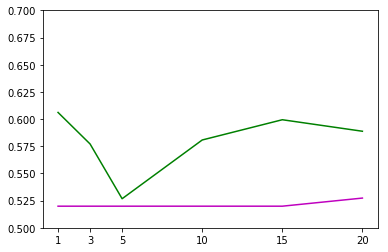

In [9]:
sweep_helpers('best_affinity', 'ligand', save='ligand_best_affinity')

284
284
284
284
284
279


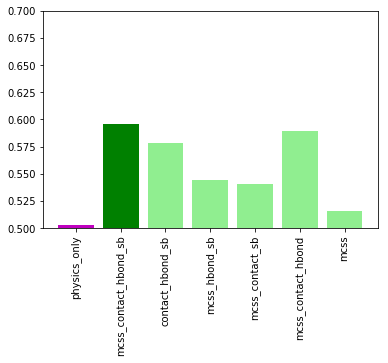

In [10]:
sweep_features('best_mcss', 'target', save='target_best_mcss')

284
284
284
284
282
284


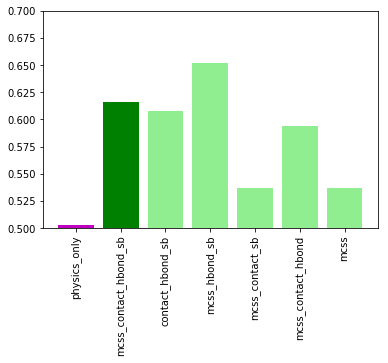

In [11]:
sweep_features('best_affinity_diverse', 'target', save='target_best_affinity_diverse')

284
284
284
284
284
284


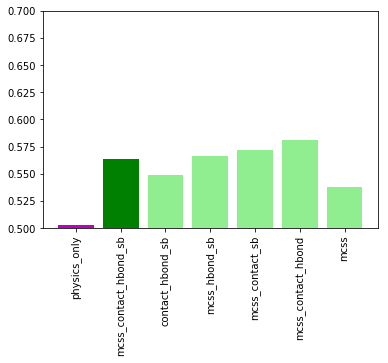

In [12]:
sweep_features('best_affinity', 'target', save='target_best_affinity')

284
284
284
284
284
279


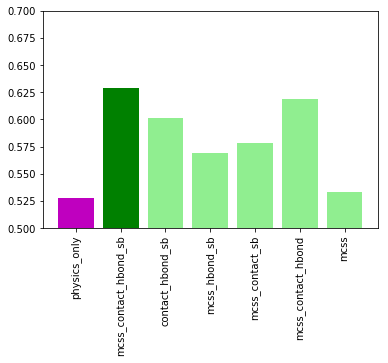

In [13]:
sweep_features('best_mcss', 'ligand', save='ligand_best_mcss')

284
284
284
284
282
284


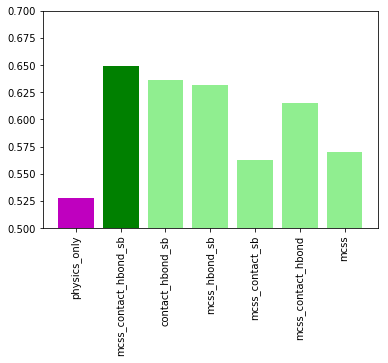

In [14]:
sweep_features('best_affinity_diverse', 'ligand', save='ligand_best_affinity_diverse')

284
284
284
284
284
284


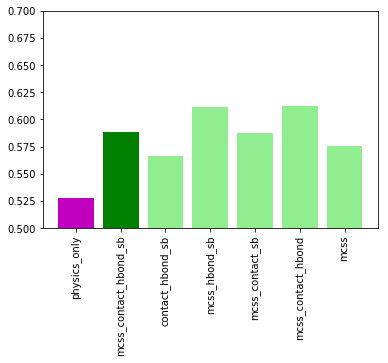

In [15]:
sweep_features('best_affinity', 'ligand', save='ligand_best_affinity')